## Airquality Dataset

### Outlier detector: **IsolationForest(n_estimators=20, random_state=10101)**

In [2]:
import os
import pickle
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt 
from utils import *
from STSC.stsc import *

### set outlier detector parameters 

In [3]:
set_x_generation_paramters(n_estimators=20, random_state=10101)

In [4]:
dataset_name = 'airquality'
data, outliers_index, inliers_index = read_dataset(dataset_name)
X, SQ, fp_record = generate_X_SQ(data, outliers_index) # fp_record會回傳數字對應到的feature pair 
G = generate_graph(X)
V = get_V(G)
if not os.path.isfile('./weights/outlier_weight_{}.npy'.format(dataset_name)):
    S = maximum_weight_matching(SQ, V)
    np.save("./weights/outlier_weight_{}".format(dataset_name), S)
else:
    S = np.load("./weights/outlier_weight_{}.npy".format(dataset_name))
n_cluster = 8
C = self_tuning_spectral_clustering_np(S, max_n_cluster=13)   
# with open('./weights/{}_cluster_{}.pickle'.format(n_cluster, dataset_name), 'wb') as f:
#     pickle.dump(C, f)
print('number of cluster: ', len(C))

Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


n_cluster: 2 	 cost: 867108.824708
n_cluster: 3 	 cost: 3349961.038728
n_cluster: 4 	 cost: 394347.641665
n_cluster: 5 	 cost: 27392.993668
n_cluster: 6 	 cost: 1858.060270
n_cluster: 7 	 cost: 1904.110232
n_cluster: 8 	 cost: 1992.065598
n_cluster: 9 	 cost: 2020.022178
n_cluster: 10 	 cost: 2004.697788
n_cluster: 11 	 cost: 2004.567124
n_cluster: 12 	 cost: 2102.458828
n_cluster: 13 	 cost: 2385.441010
number of cluster:  6


In [5]:
W_1 = cvx_solver(C, X, X.shape[1], 1)
W_3 = cvx_solver(C, X, X.shape[1], 3)
W_5 = cvx_solver(C, X, X.shape[1], 5)
W_10 = cvx_solver(C, X, X.shape[1], 10)


### 分別實驗 lambda=1、3、5、10

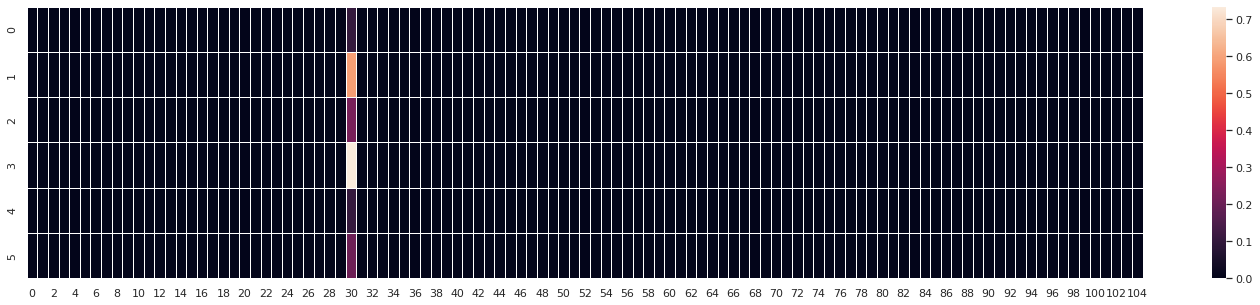

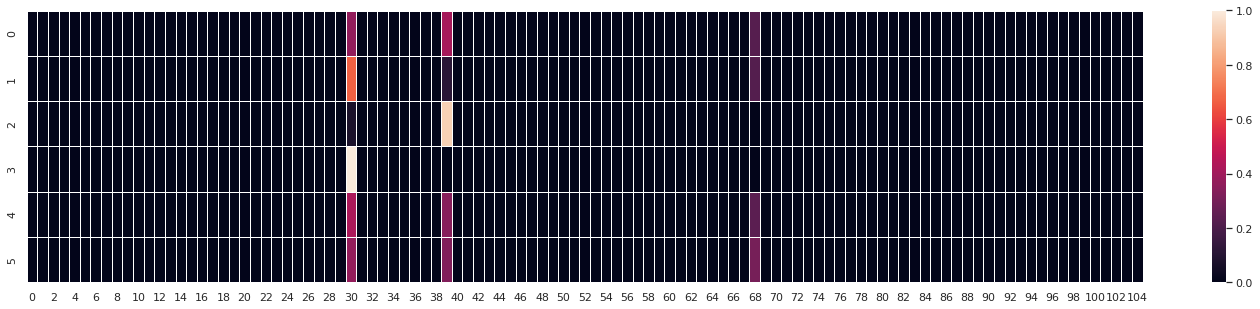

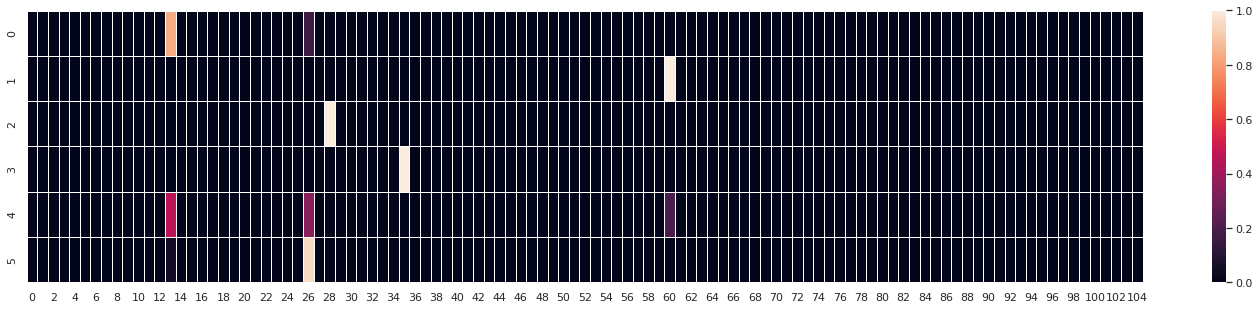

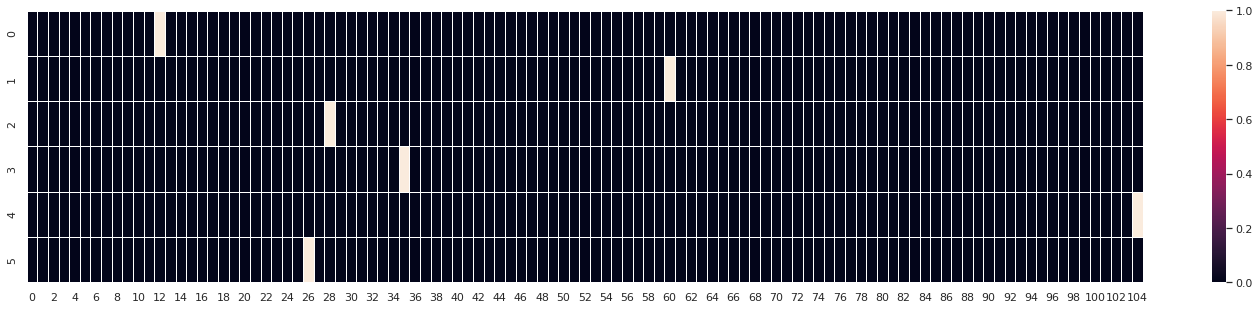

In [6]:
draw_heatmap(W_1.T) # lambda = 1  <====== global 
draw_heatmap(W_3.T) # lambda = 3 
draw_heatmap(W_5.T) # lambda = 5
draw_heatmap(W_10.T)   # lambda = 10  <===== local

### 為每個cluster找出最佳的feature pairs

In [7]:
cluster_fp_1 = get_clusters_fps(W_1.T, fp_record)
cluster_fp_3 = get_clusters_fps(W_3.T, fp_record)
cluster_fp_5 = get_clusters_fps(W_5.T, fp_record)
cluster_fp_10 = get_clusters_fps(W_10.T, fp_record)

In [8]:
df_list = [create_df(data[outliers_index], data[inliers_index], C[i]) for i in range(len(C))]

### Lambda = 1 

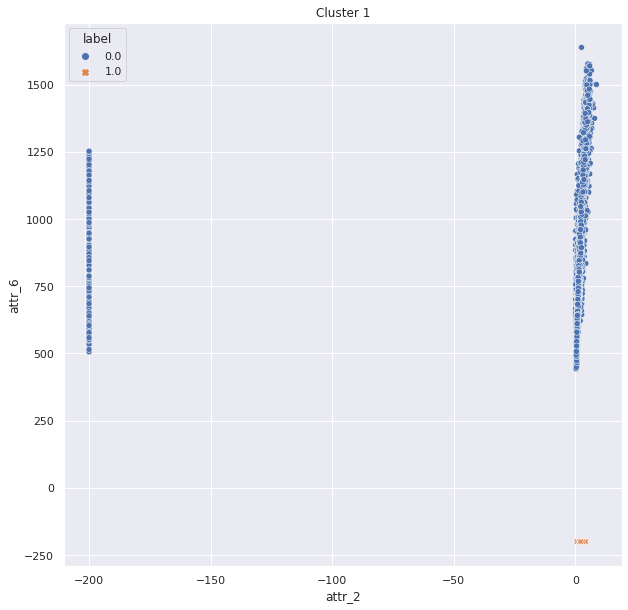

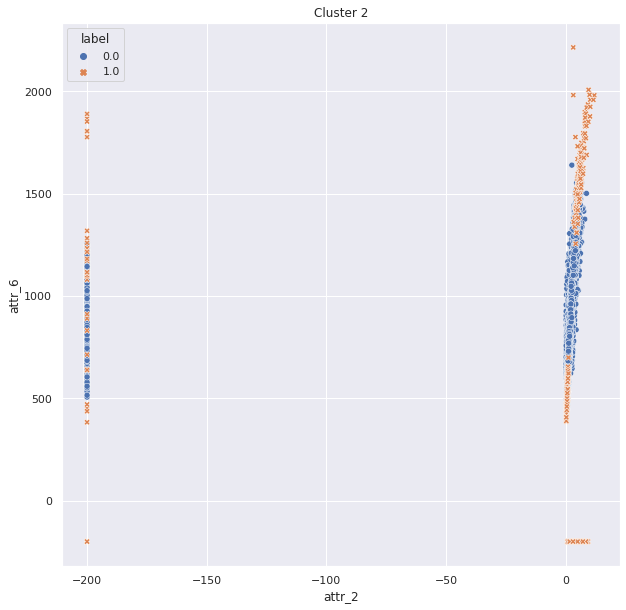

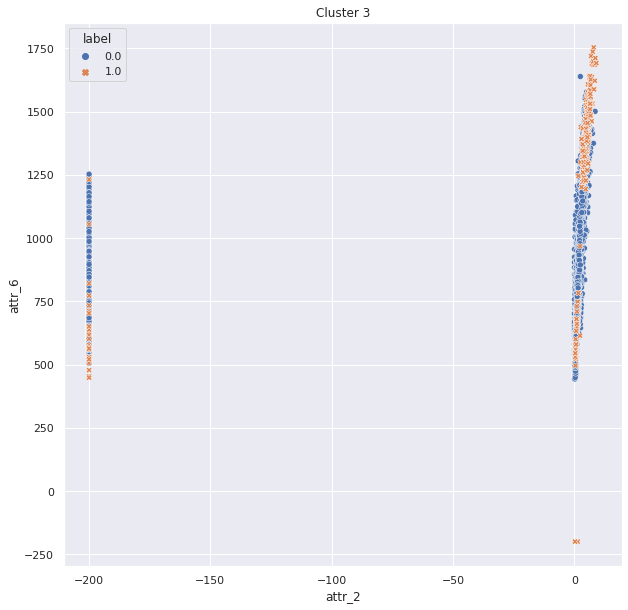

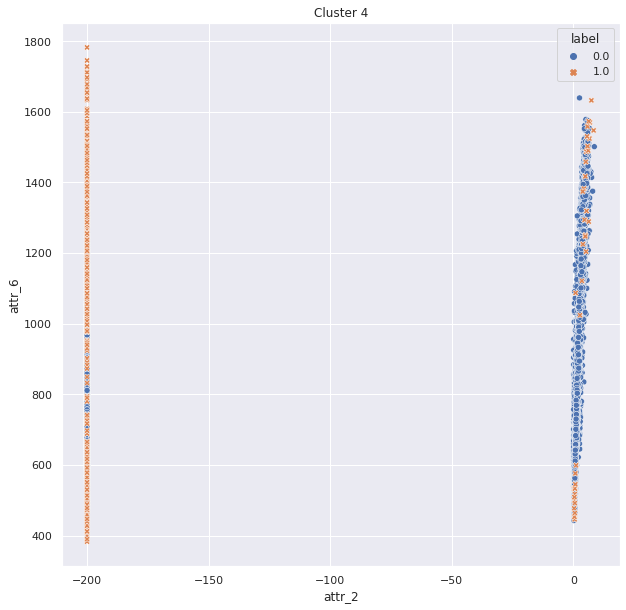

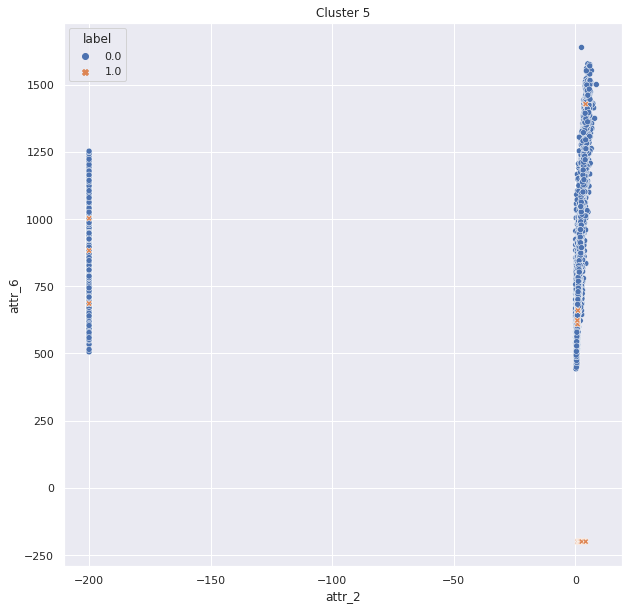

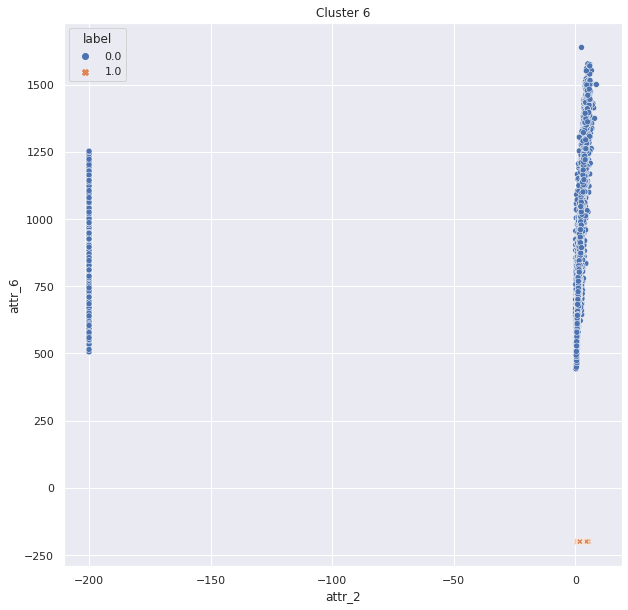

In [9]:
draw_scatter(df_list, cluster_fp_1)

### Lambda = 3 

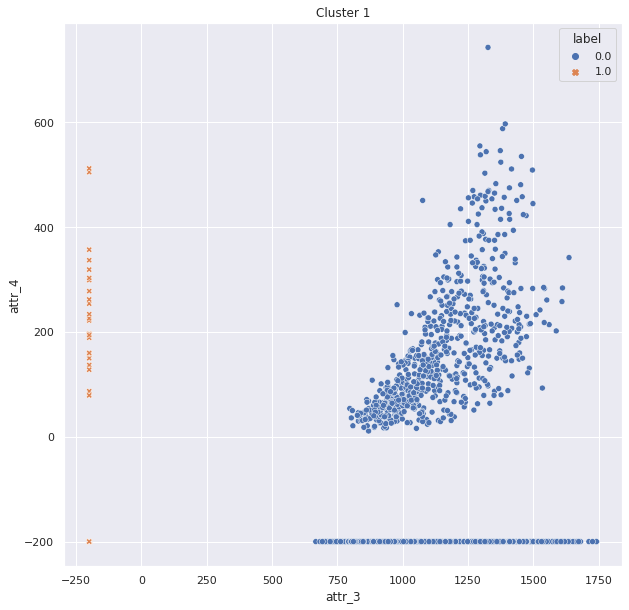

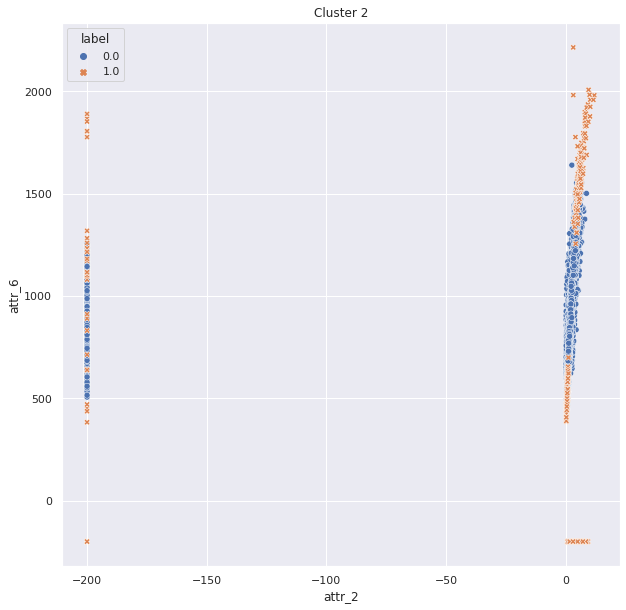

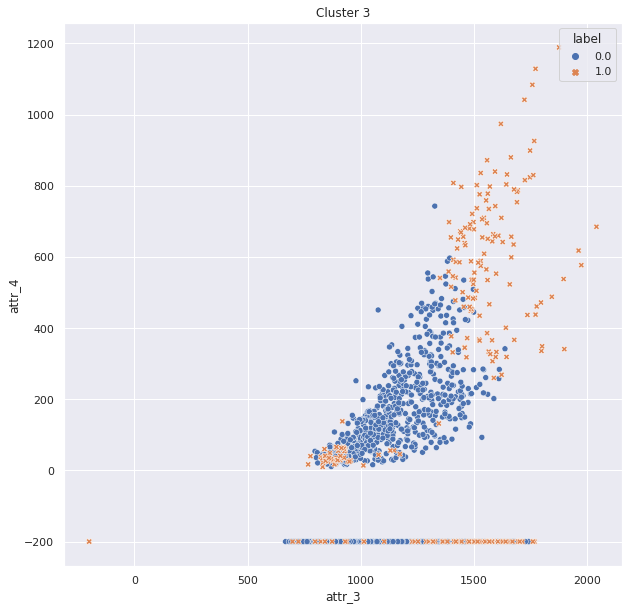

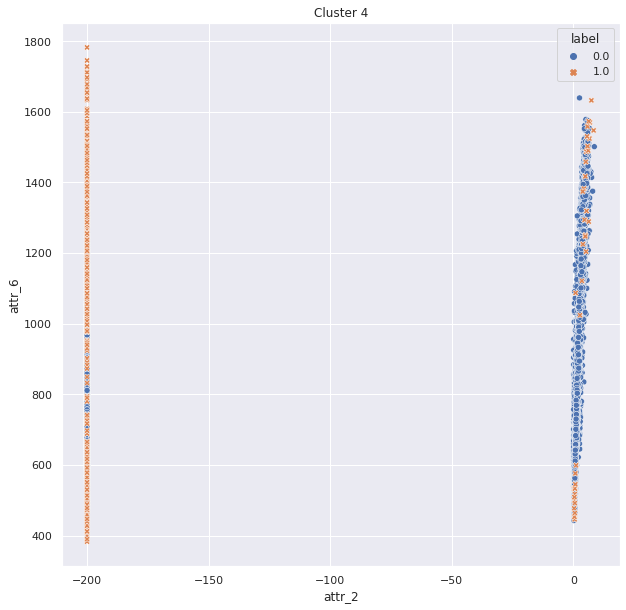

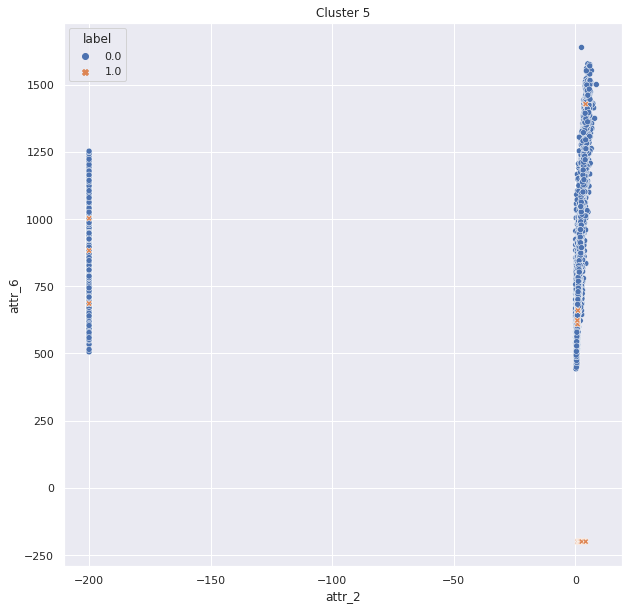

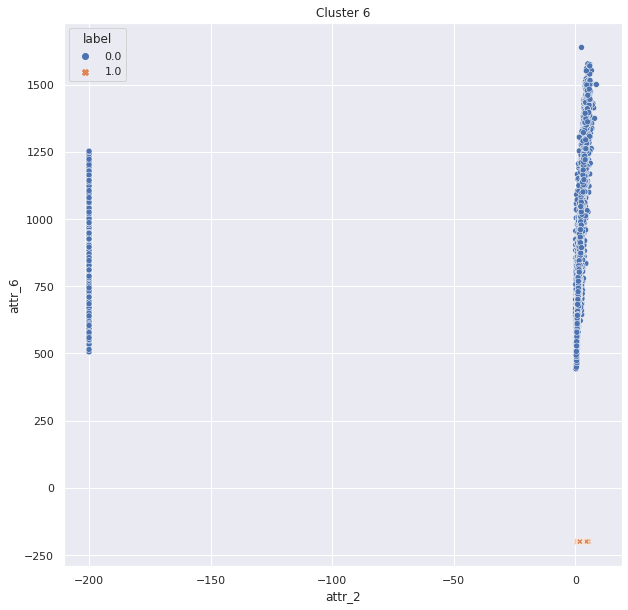

In [10]:
draw_scatter(df_list, cluster_fp_3)

### Lambda = 5

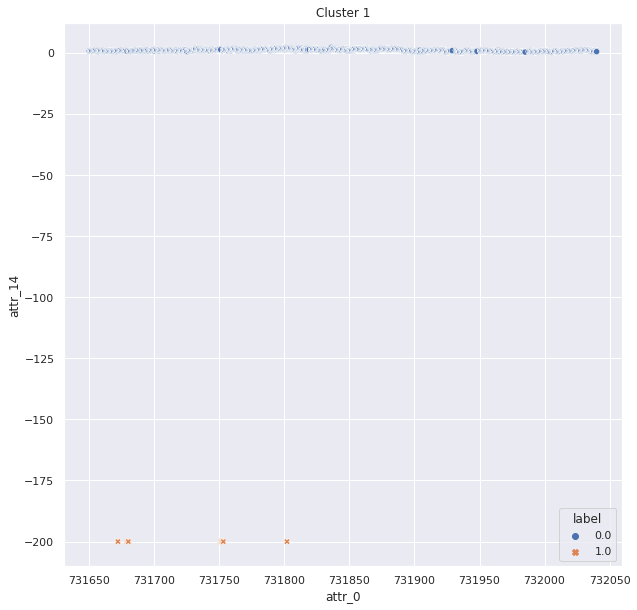

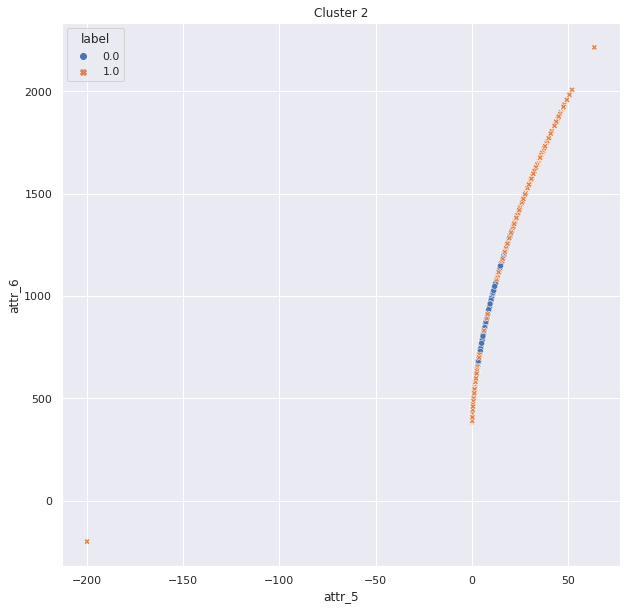

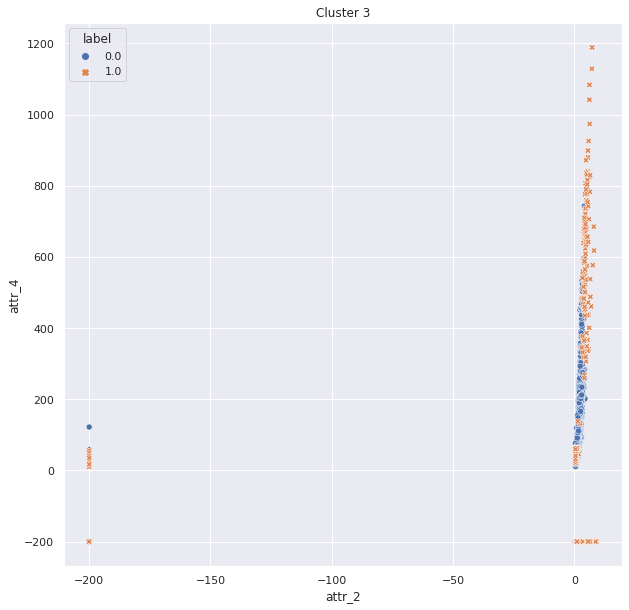

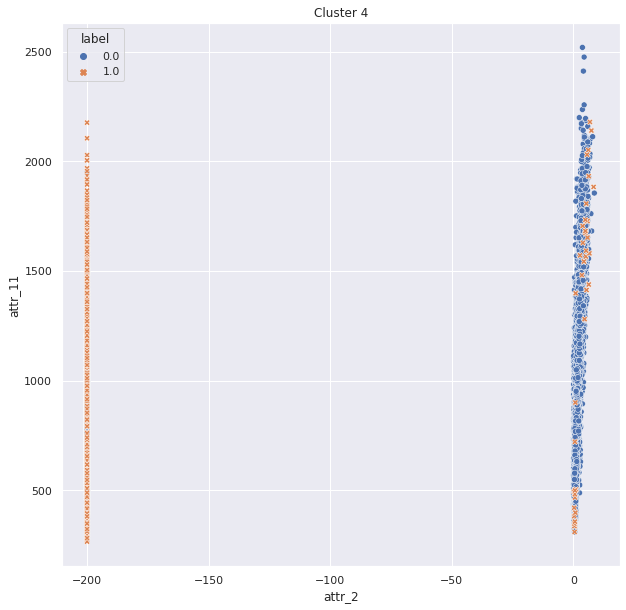

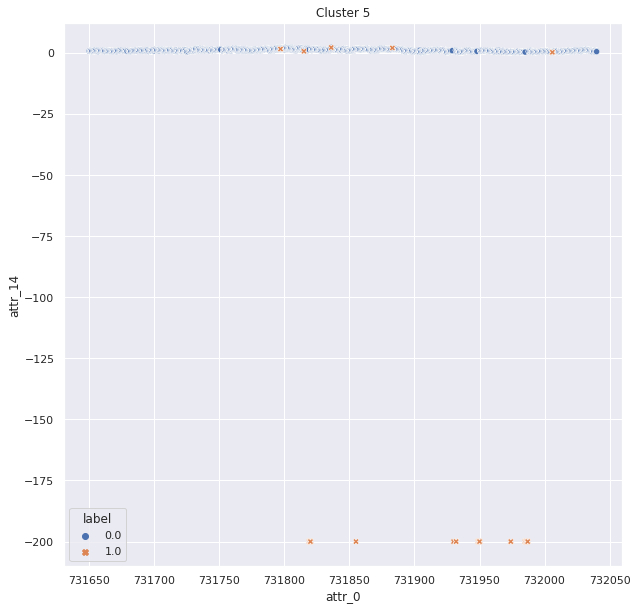

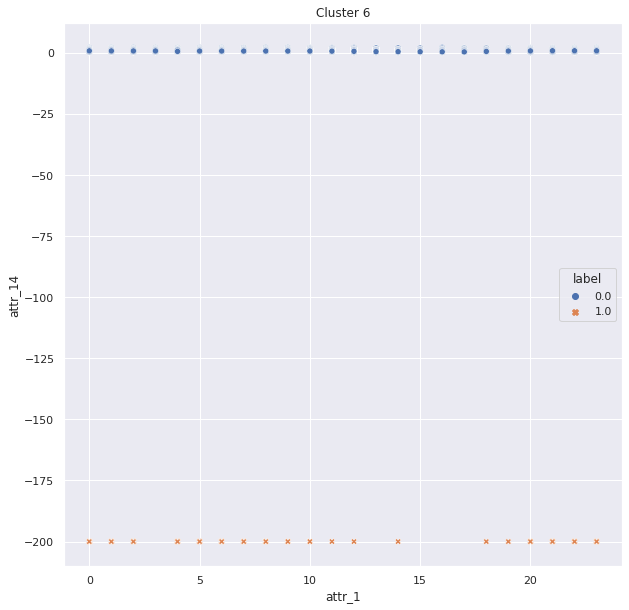

In [11]:
draw_scatter(df_list, cluster_fp_5)

### Lambda = 10

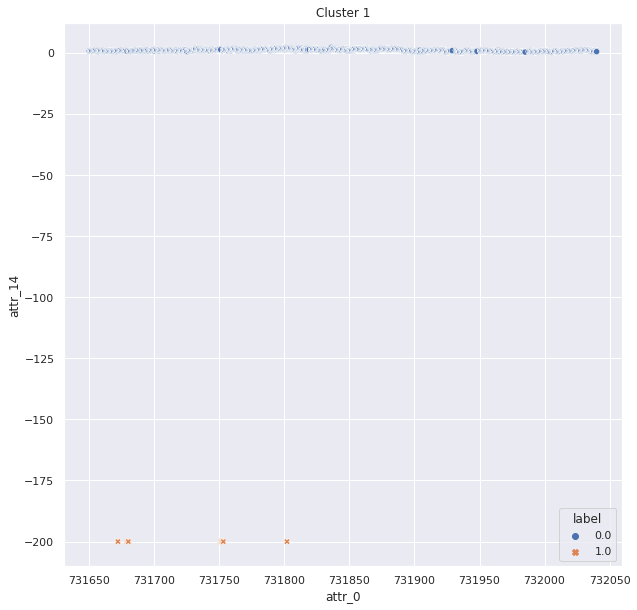

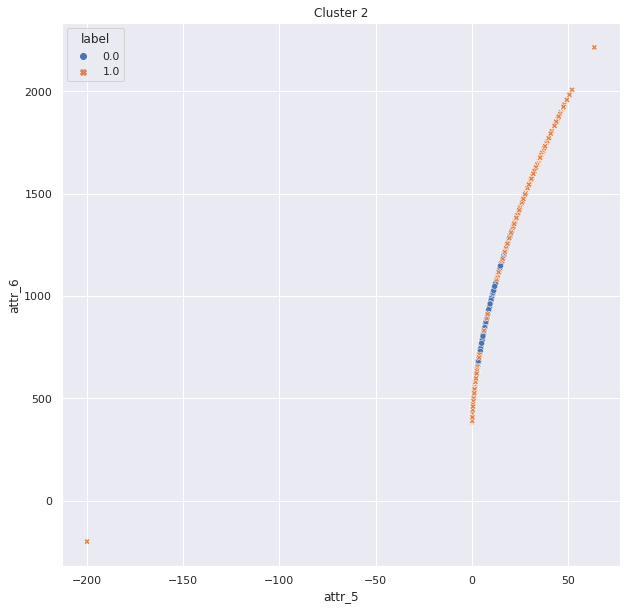

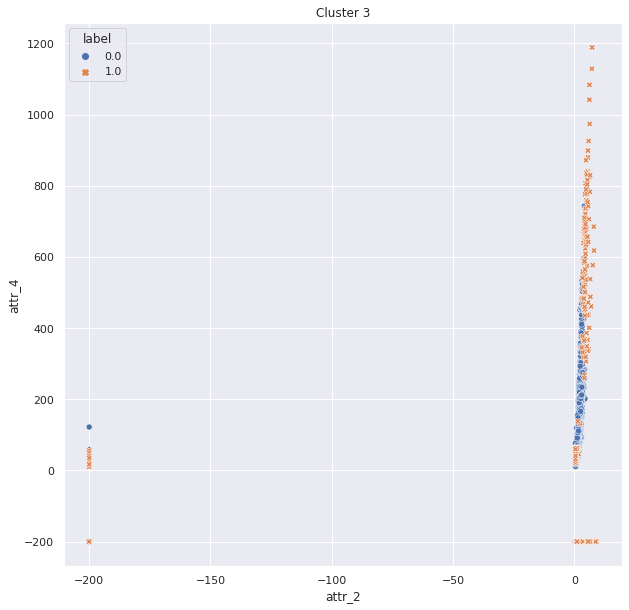

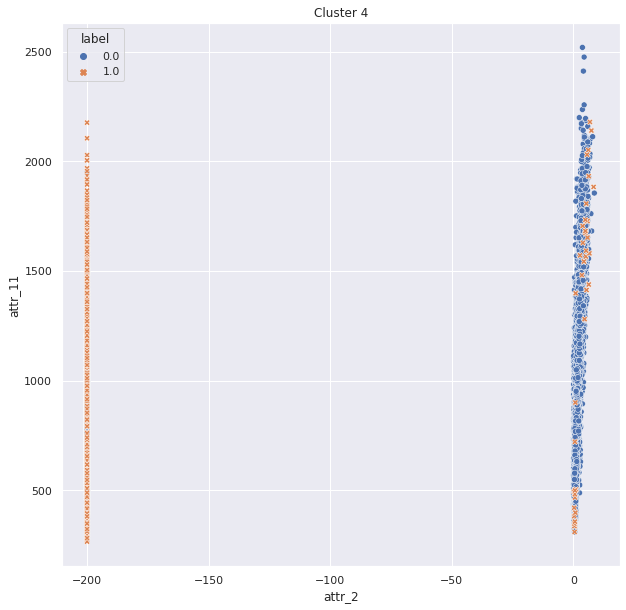

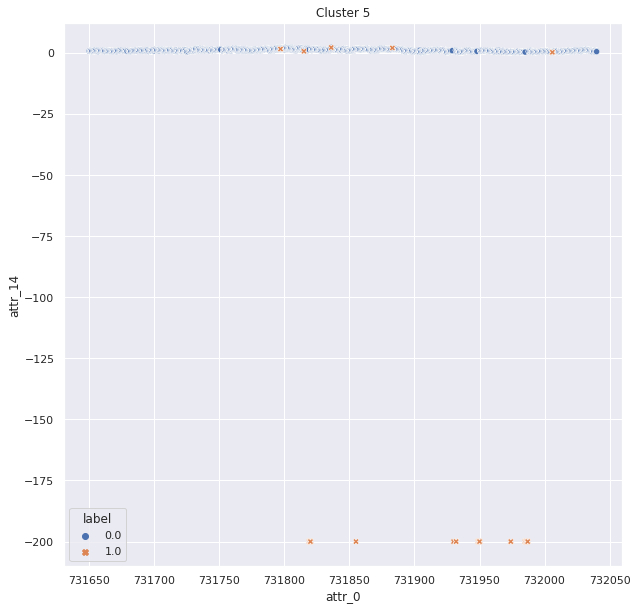

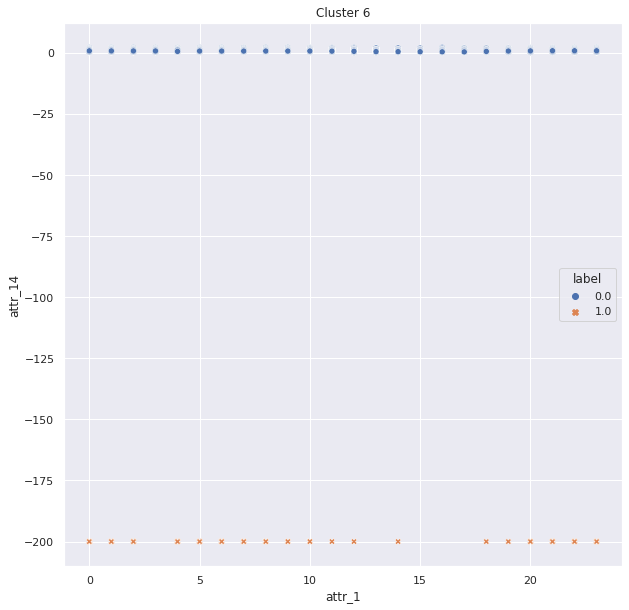

In [12]:
draw_scatter(df_list, cluster_fp_5)